<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06


**Objetivo**: Aplicar técnicas básicas de **Machine Learning**, desde la preparación de datos hasta el entrenamiento y evaluación de modelos.




<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [35]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



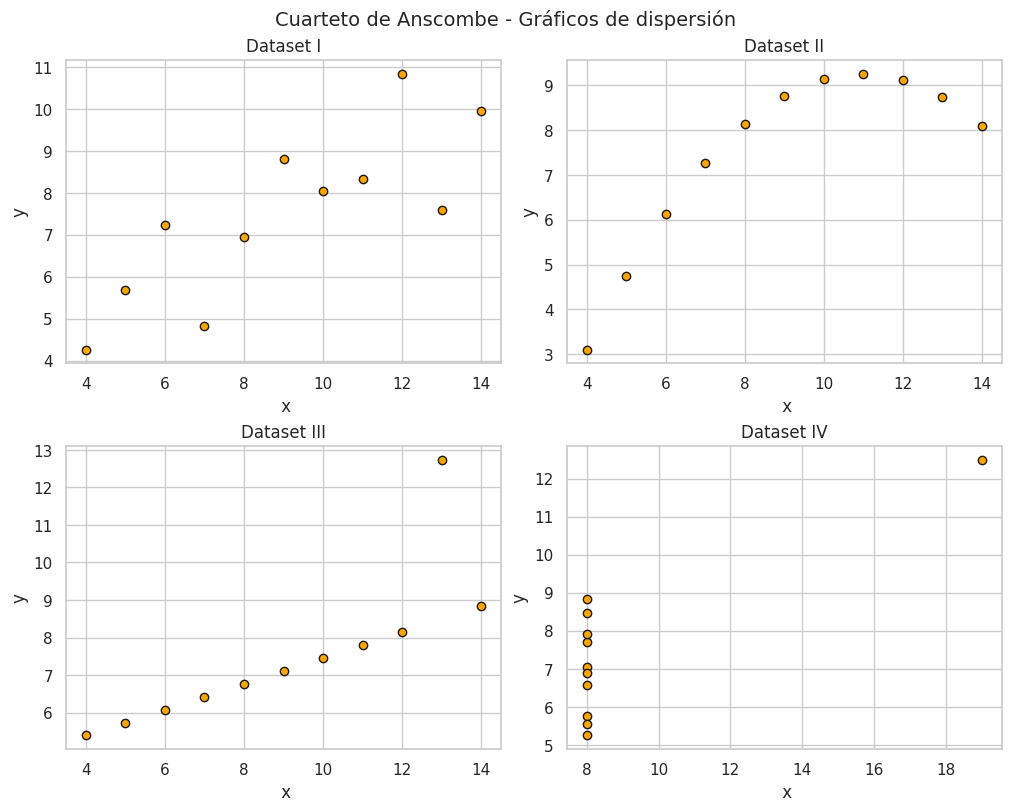

In [36]:
# FIXME

fig, axes = plt.subplots(2, 2, figsize=(10, 8), constrained_layout=True) #ploteo previo para poner datos
axes = axes.ravel()

for ax, (name, group) in zip(axes, data.groupby("dataset")): #iteracion para crear los 4 graficos
    ax.scatter(group["x"], group["y"], color="orange", edgecolor="k") #pone los puntos en el grafico


    ax.set_title(f"Dataset {name}") #titulo de cada grafico respectivamente
    ax.set_xlabel(" x")    #x label
    ax.set_ylabel("y"  )    #y label

plt.suptitle("Cuarteto de Anscombe - Gráficos de dispersión", fontsize=14)
plt.show()


2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [37]:
resumen = data.groupby("dataset")[["x", "y"]].describe()
print(resumen)

            x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50  


3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



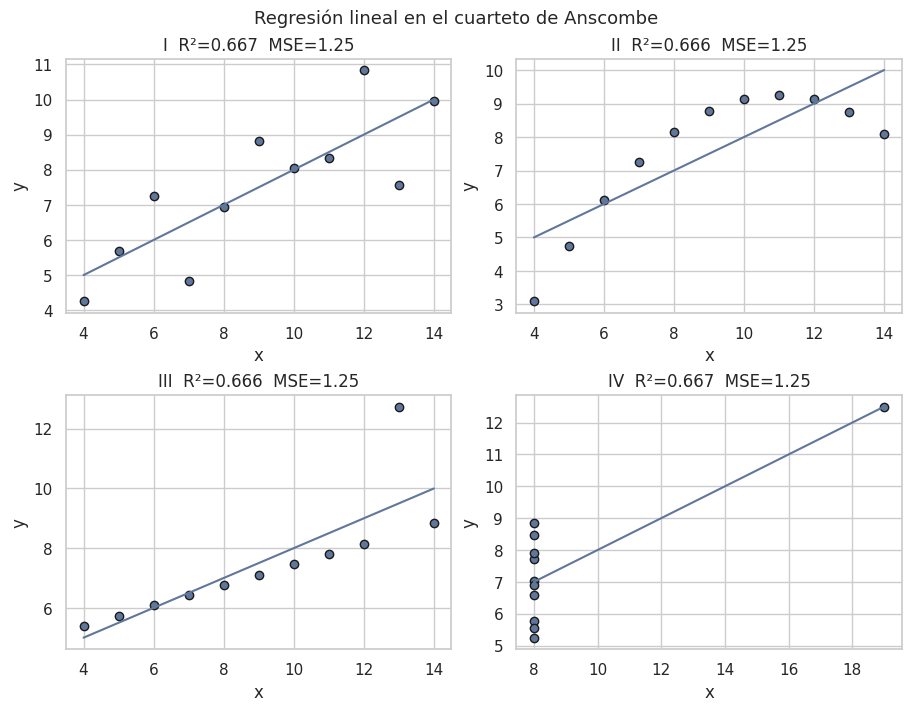

dataset  beta0_intercept  beta1_slope      MSE       R2
      I         3.000091     0.500091 1.251154 0.666542
     II         3.000909     0.500000 1.252390 0.666242
    III         3.002455     0.499727 1.250563 0.666324
     IV         3.001727     0.499909 1.249317 0.666707


In [38]:
# FIXME

orden = ["I", "II", "III", "IV"]
grupos = [data[data["dataset"] == k] for k in orden] #temas d e orden

resultados = [] #se usara para la tabla con la informacion pedida

fig, axes = plt.subplots(2, 2, figsize=(9, 7), constrained_layout=True) #para setear los 4 graficos
axes = axes.ravel()

for ax, g, name in zip(axes, grupos, orden):
    X = g[["x"]].values         # (n,1)
    y = g["y"].values           # (n,)


    model = LinearRegression().fit(X, y)   #ajuste lineal
    y_hat = model.predict(X)

    # Métricas
    mse = mean_squared_error(y, y_hat)    #calculo de mse y r^2 , son vectoriales
    r2  = r2_score(y, y_hat)

    resultados.append({  #se ponen los datos en la matriz resultado, para luego poner la tabla, bastante straighforward (en mi opinion).
        "dataset": name,
        "beta0_intercept": float(model.intercept_),
        "beta1_slope": float(model.coef_[0]),
        "MSE": mse,
        "R2": r2
    })

    # Gráfico: datos + recta
    ax.scatter(g["x"], g["y"], edgecolor="k")
    xx = np.linspace(g["x"].min(), g["x"].max(), 100).reshape(-1, 1)
    ax.plot(xx, model.predict(xx))  #ploteo
    ax.set_title(f"{name}  R²={r2:.3f}  MSE={mse:.2f}") #puse en  el titulo tanto el R^2 como el MSE
    ax.set_xlabel("x"); ax.set_ylabel("y") #las label de siempre

plt.suptitle("Regresión lineal en el cuarteto de Anscombe", fontsize=13) #titulo del todo
plt.show()

# una tabla adicional con datos de cada uno de los 4 graficos
tabla = pd.DataFrame(resultados).sort_values("dataset")
print(tabla.to_string(index=False))


4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

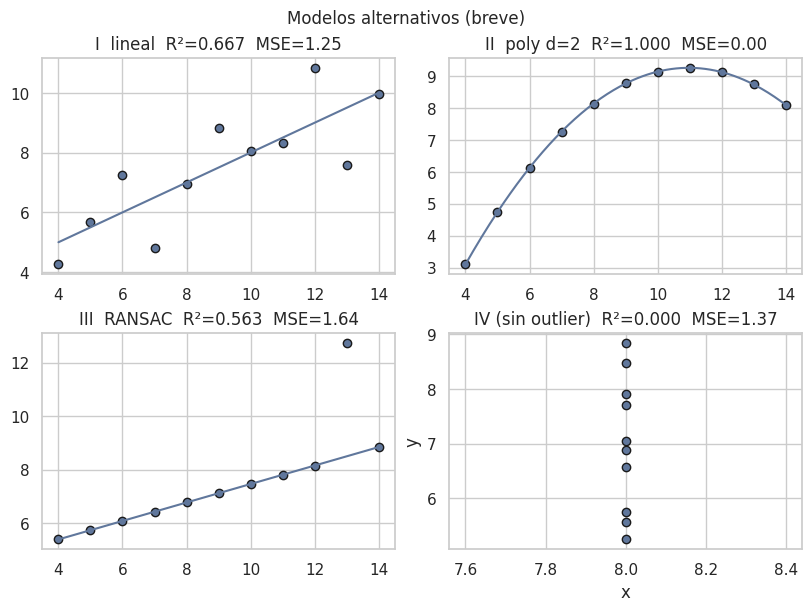

,dataset,modelo,R2,MSE
0,I,lineal,0.666542,1.251154
1,II,poly2,0.999999,0.000002
2,III,ransac,0.563044,1.637640
3,IV,lineal_sin_outlier,0.000000,1.374249


In [39]:
# FIXME

from sklearn.linear_model import RANSACRegressor #tipo de modelo que te quita los outlier


fig, axes = plt.subplots(2, 2, figsize=(8, 6), constrained_layout=True) #preparacion de los 4 graficos, lo mismo de siempre
axes = axes.ravel()
res = []

#_____________________________________________________I




g = data[data["dataset"]=="I"] #lo mismo de antes, el modelo se mantiene linear pues se ajusta "bien"
X=g[["x"]].values #se vuelven a poner para que no hayan errores con respecto al grafico anterior (el ultimo del item anterior)
y=g["y"].values  #mismo que arriba, no es el mejor metodo pero es lo mas facil de pensar
lin = LinearRegression().fit(X,y) #el modelo de regresion linear se mantiene
axes[0].scatter(X,y, edgecolor="k") #los puntos marcados
xx = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
axes[0].plot(xx, lin.predict(xx))


mse = mean_squared_error(y, lin.predict(X)) #mse y r2
r2 = r2_score(y, lin.predict(X))



axes[0].set_title(f"I  lineal  R²={r2:.3f}  MSE={mse:.2f}") #cosas aesthetic
res.append({"dataset":"I","modelo":"lineal","R2":r2,"MSE":mse})#poner la info en la tabla, se hara 3 veces mas

#________________________________II



g = data[data["dataset"]=="II"]

x=g["x"].values

y=g["y"].values#lo mismo que antes


p2 = np.poly1d(np.polyfit(x, y, 2))#se cambia el modelo a algo que se ajuste mejor


axes[1].scatter(x,y, edgecolor="k") #los puntos
xx = np.linspace(x.min(), x.max(), 200)#datos, metricas y cosas aesthetic para abajo, nada nuevo bajo el sol
axes[1].plot(xx, p2(xx))


mse = mean_squared_error(y, p2(x))#mse y r2
r2 = r2_score(y, p2(x))


axes[1].set_title(f"II  poly d=2  R²={r2:.3f}  MSE={mse:.2f}") #cosas aesthetic
res.append({"dataset":"II","modelo":"poly2","R2":r2,"MSE":mse})

#______________________________________III

g = data[data["dataset"]=="III"]

X=g[["x"]].values
y=g["y"].values



ransac = RANSACRegressor(LinearRegression(), random_state=0).fit(X,y) #modelo que no considera outliers, mas facil que quitar puntos a mano


axes[2].scatter(X,y, edgecolor="k") #mismo que antes
xx = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
axes[2].plot(xx, ransac.predict(xx))


mse = mean_squared_error(y, ransac.predict(X)) # mse y r2
r2 = r2_score(y, ransac.predict(X))


axes[2].set_title(f"III  RANSAC  R²={r2:.3f}  MSE={mse:.2f}")
res.append({"dataset":"III","modelo":"ransac","R2":r2,"MSE":mse})

#_____________________________________IV


g = data[data["dataset"] == "IV"]
g_clean = g[g["x"] != g["x"].max()]      # eliminas el mas grande, es el que causa problermas

X = g_clean[["x"]].values
y = g_clean["y"].values

lin = LinearRegression().fit(X, y) #un modelo linear funciona bien, ya que ya se saco el outlier (tambien se pudo haber usado ransac)
yhat = lin.predict(X)

ax = axes[3]                              # plot más extras
ax.clear()
ax.scatter(g_clean["x"], g_clean["y"], edgecolor="k")
xx = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
ax.plot(xx, lin.predict(xx))
ax.set_title(f"IV (sin outlier)  R²={r2_score(y,yhat):.3f}  MSE={mean_squared_error(y,yhat):.2f}")
ax.set_xlabel("x"); ax.set_ylabel("y")

res.append({
    "dataset": "IV",
    "modelo": "lineal_sin_outlier",
    "R2": r2_score(y, yhat),
    "MSE": mean_squared_error(y, yhat)
})





plt.suptitle("Modelos alternativos (breve)", fontsize=12)

plt.show()

pd.DataFrame(res).sort_values("dataset")

